In [1]:
import pandas as pd

ad_sales = pd.read_csv("Product-Level Ad Sales and Metrics (mapped) - Product-Level Ad Sales and Metrics (mapped).csv")
total_sales = pd.read_csv("Product-Level Total Sales and Metrics (mapped) - Product-Level Total Sales and Metrics (mapped).csv")
eligibility = pd.read_csv("Product-Level Eligibility Table (mapped) - Product-Level Eligibility Table (mapped).csv")

# Display heads
print(" Ad Sales Data:")
display(ad_sales.head())

print(" Total Sales Data:")
display(total_sales.head())

print(" Eligibility Data:")
display(eligibility.head())

 Ad Sales Data:


,date,item_id,ad_sales,impressions,ad_spend,clicks,units_sold
0,2025-06-01,0,332.96,1963,16.87,8,3
1,2025-06-01,1,0.00,1764,20.39,11,0
2,2025-06-01,2,95.99,169,0.48,0,1
3,2025-06-01,3,1001.93,6943,75.69,31,9
4,2025-06-01,4,1096.98,59046,401.39,285,5


 Total Sales Data:


,date,item_id,total_sales,total_units_ordered
0,2025-06-01,0,309.99,1
1,2025-06-01,3,338.00,2
2,2025-06-01,4,617.99,3
3,2025-06-01,9,219.00,1
4,2025-06-01,12,534.00,3


 Eligibility Data:


,eligibility_datetime_utc,item_id,eligibility,message
0,2025-06-04 8:50:07,29,False,This product's cost to Amazon does not allow u...
1,2025-06-04 8:50:07,270,True,NaN
2,2025-06-04 8:50:07,31,True,NaN
3,2025-06-04 8:50:07,26,True,NaN
4,2025-06-04 8:50:07,25,True,NaN


In [2]:
def clean_columns(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace('[^a-z0-9_]', '_', regex=True)
    )
    return df

ad_sales = clean_columns(ad_sales)
total_sales = clean_columns(total_sales)
eligibility = clean_columns(eligibility)


In [3]:
print("Ad Sales:\n", ad_sales.isnull().sum())
print("\nTotal Sales:\n", total_sales.isnull().sum())
print("\nEligibility:\n", eligibility.isnull().sum())


Ad Sales:
 date           0
item_id        0
ad_sales       0
impressions    0
ad_spend       0
clicks         0
units_sold     0
dtype: int64

Total Sales:
 date                   0
item_id                0
total_sales            0
total_units_ordered    0
dtype: int64

Eligibility:
 eligibility_datetime_utc       0
item_id                        0
eligibility                    0
message                     3745
dtype: int64


In [4]:
# Preview
ad_sales.head(), total_sales.head(), eligibility.head()

# Check nulls
print("Ad Sales:\n", ad_sales.isnull().sum())
print("\nTotal Sales:\n", total_sales.isnull().sum())
print("\nEligibility:\n", eligibility.isnull().sum())


Ad Sales:
 date           0
item_id        0
ad_sales       0
impressions    0
ad_spend       0
clicks         0
units_sold     0
dtype: int64

Total Sales:
 date                   0
item_id                0
total_sales            0
total_units_ordered    0
dtype: int64

Eligibility:
 eligibility_datetime_utc       0
item_id                        0
eligibility                    0
message                     3745
dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_analysis(dataset, label=None):
    df_corr = dataset.copy()

    # Factorize object types
    for col in df_corr.select_dtypes(include='object').columns:
        df_corr[col] = pd.factorize(df_corr[col])[0]

    # Compute correlation
    corr_matrix = df_corr.corr()

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
    plt.title("Correlation Matrix")
    plt.show()

    # Correlation with label (if applicable)
    if label and label in corr_matrix.columns:
        label_corr = corr_matrix[label].drop(label)
        threshold = 0.05
        not_useful = label_corr[abs(label_corr) < threshold]
        useful = label_corr[abs(label_corr) >= threshold]

        result_df = pd.DataFrame({
            "Not Useful Features (|corr| < 0.05)": not_useful.index.tolist() + [""] * (len(useful) - len(not_useful)),
            "Useful Features (|corr| >= 0.05)": useful.index.tolist() + [""] * (len(not_useful) - len(useful))
        })
        print(result_df.to_string(index=False))


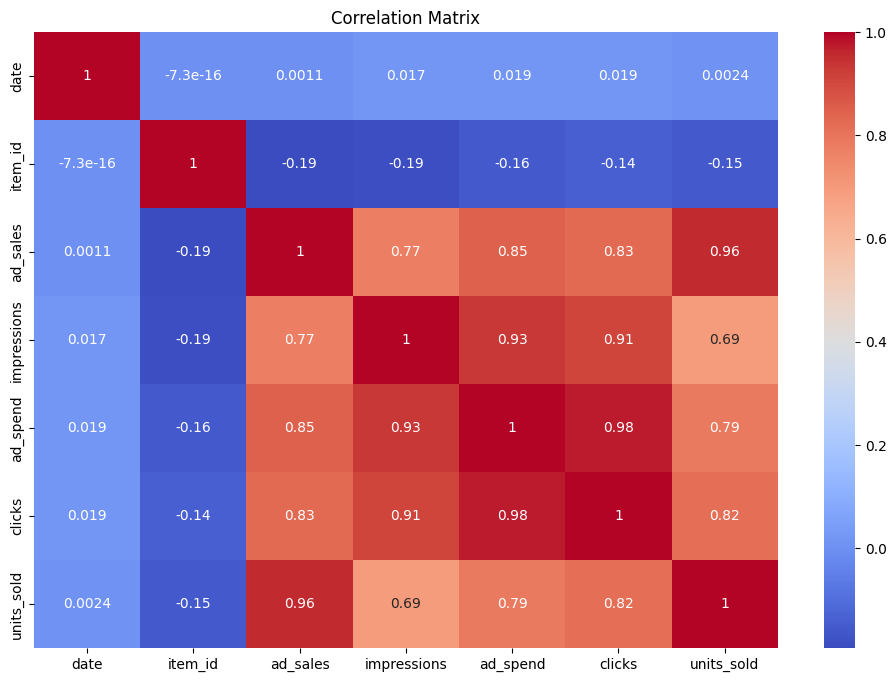

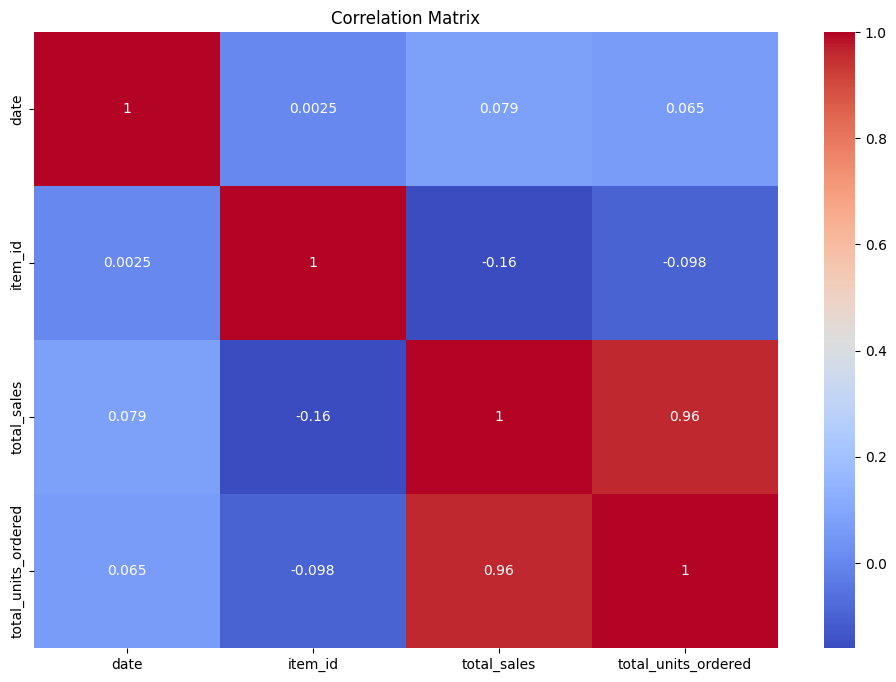

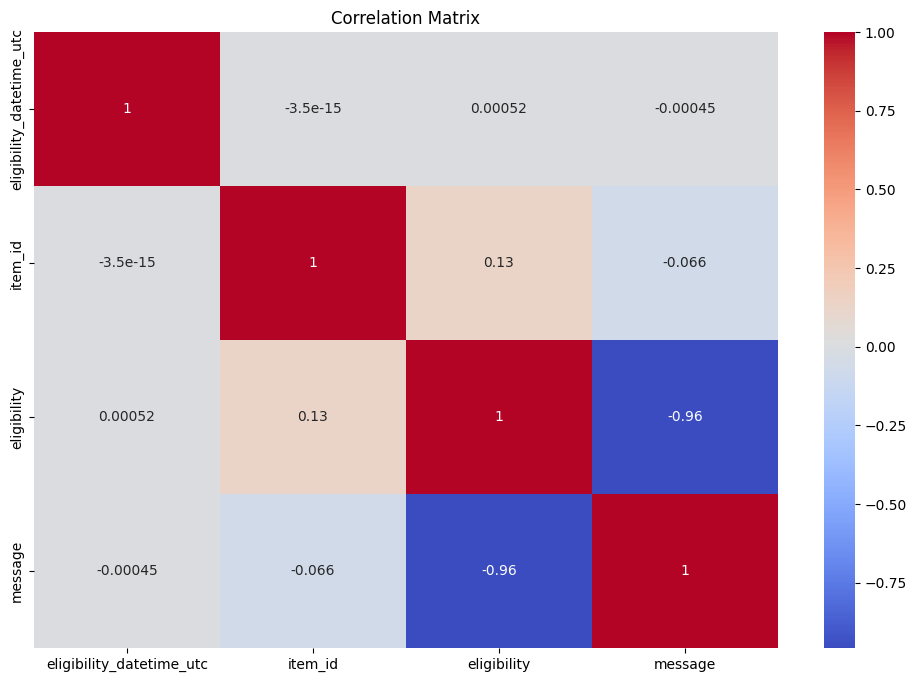

In [6]:
correlation_analysis(ad_sales, label='Clicks')
correlation_analysis(total_sales, label='Total_Sales')
correlation_analysis(eligibility, label='Eligible')


In [7]:
# Remove Duplicates
ad_sales.drop_duplicates(inplace=True)
total_sales.drop_duplicates(inplace=True)
eligibility.drop_duplicates(inplace=True)

# Drop rows missing critical info (based on analysis)
ad_sales.dropna(subset=['item_id', 'ad_spend', 'clicks'], inplace=True)
total_sales.dropna(subset=['item_id', 'total_sales'], inplace=True)
eligibility.dropna(subset=['item_id', 'eligibility'], inplace=True)

# Fill other columns if needed
# Note: The 'CPC' column does not exist in ad_sales DataFrame, so this line will be removed.
# ad_sales['CPC'] = ad_sales['CPC'].fillna(ad_sales['CPC'].mean())

In [8]:
ad_sales['date'] = pd.to_datetime(ad_sales['date'])
pd.to_datetime(eligibility['eligibility_datetime_utc'])

,eligibility_datetime_utc
0,2025-06-04 08:50:07
1,2025-06-04 08:50:07
2,2025-06-04 08:50:07
3,2025-06-04 08:50:07
4,2025-06-04 08:50:07
...,...
4376,2025-06-03 08:50:28
4377,2025-06-03 08:50:28
4378,2025-06-03 08:50:28
4379,2025-06-03 08:50:28


In [9]:
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

ad_sales = clean_columns(ad_sales)
total_sales = clean_columns(total_sales)
eligibility = clean_columns(eligibility)


In [10]:
print(ad_sales.info())
print(total_sales.info())
print(eligibility.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3696 non-null   datetime64[ns]
 1   item_id      3696 non-null   int64         
 2   ad_sales     3696 non-null   float64       
 3   impressions  3696 non-null   int64         
 4   ad_spend     3696 non-null   float64       
 5   clicks       3696 non-null   int64         
 6   units_sold   3696 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 202.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 702 non-null    object 
 1   item_id              702 non-null    int64  
 2   total_sales          702 non-null    float64
 3   total_units_ordere

In [11]:
ad_sales.to_csv("clean_ad_sales.csv", index=False)
total_sales.to_csv("clean_total_sales.csv", index=False)
eligibility.to_csv("clean_eligibility.csv", index=False)


In [12]:
import sqlite3

# Connect to in-memory DB or create file-based DB
conn = sqlite3.connect('ecommerce.db')
cursor = conn.cursor()


In [13]:
ad_sales = pd.read_csv('clean_ad_sales.csv')
total_sales = pd.read_csv('clean_total_sales.csv')
eligibility = pd.read_csv('clean_eligibility.csv')


In [14]:
ad_sales.to_sql('AdSales', conn, if_exists='replace', index=False)
total_sales.to_sql('TotalSales', conn, if_exists='replace', index=False)
eligibility.to_sql('Eligibility', conn, if_exists='replace', index=False)


4381

In [15]:
ad_sales.to_csv('product_level_sales_and_metrics_improved.csv', index=False)
print("Done")

Done


In [16]:
eligibility.to_csv('product_level_eligibility_table_improved.csv', index=False)
print("Done")

Done


In [17]:
total_sales.to_csv('producT_leve_totla_sales_and_metrics_improved.csv', index = False)
print("Done")

Done


SQL  Table creation

In [18]:
import sqlite3

In [19]:
db_file_path = 'ecommerce_data.db'
print(f"Database will be stored temporarily at: {db_file_path}")

Database will be stored temporarily at: ecommerce_data.db


In [59]:
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()

In [60]:
create_eligibility_sql = """
CREATE TABLE IF NOT EXISTS product_level_eligibility_table (
    item_id INTEGER NOT NULL,
    eligibility_datetime_utc DATETIME NOT NULL,
    eligibility BOOLEAN, -- SQLite stores BOOLEAN as INTEGER (0 for False, 1 for True)
    message TEXT,        -- Allows NULL values as it's not NOT NULL
    PRIMARY KEY (item_id, eligibility_datetime_utc)
);
"""
cursor.execute(create_eligibility_sql)
print("Table 'product_level_eligibility_table' created or already exists.")

Table 'product_level_eligibility_table' created or already exists.


In [61]:
create_ad_sales_sql = """
CREATE TABLE IF NOT EXISTS product_level_ad_sales_metrics (
    date DATE NOT NULL,
    item_id INTEGER NOT NULL,
    ad_sales REAL,
    impressions INTEGER,
    ad_spend REAL,
    clicks INTEGER,
    units_sold INTEGER,
    PRIMARY KEY (date, item_id)
);
"""
cursor.execute(create_ad_sales_sql)
print("Table 'product_level_ad_sales_metrics' created or already exists.")

Table 'product_level_ad_sales_metrics' created or already exists.


In [62]:
create_total_sales_sql = """
CREATE TABLE IF NOT EXISTS product_level_total_sales_metrics (
    date DATE NOT NULL,
    item_id INTEGER NOT NULL,
    total_sales REAL,
    total_units_ordered INTEGER,
    PRIMARY KEY (date, item_id)
);
"""
cursor.execute(create_total_sales_sql)
print("Table 'product_level_total_sales_metrics' created or already exists.")

Table 'product_level_total_sales_metrics' created or already exists.


In [63]:
conn.commit()
print("All table schemas committed to the database.")

All table schemas committed to the database.


In [64]:
# Assuming the dataframes 'ad_sales', 'total_sales', and 'eligibility' are already loaded and cleaned from previous steps.
# If not, you would need to load them first, e.g.:
# ad_sales = pd.read_csv('clean_ad_sales.csv')
# total_sales = pd.read_csv('clean_total_sales.csv')
# eligibility = pd.read_csv('clean_eligibility.csv')

# Ensure eligibility dataframe has 'eligibility' column as integer for SQLite
eligibility['eligibility'] = eligibility['eligibility'].astype(int)

print("Loading data into SQL tables...")

# --- FIX: Change 'if_exists' to 'replace' for initial load/testing ---
# This will drop the table if it exists and recreate it before inserting.
eligibility.to_sql(
    'product_level_eligibility_table',
    conn,
    if_exists='replace', # Changed from 'append' to 'replace'
    index=False
)
print("Data loaded into 'product_level_eligibility_table'.")

ad_sales.to_sql(
    'product_level_ad_sales_metrics',
    conn,
    if_exists='replace', # Changed from 'append' to 'replace'
    index=False
)
print("Data loaded into 'product_level_ad_sales_metrics'.")

total_sales.to_sql(
    'product_level_total_sales_metrics',
    conn,
    if_exists='replace', # Changed from 'append' to 'replace'
    index=False
)
print("Data loaded into 'product_level_total_sales_metrics'.")

conn.commit()
print("All data committed to the database.")

Loading data into SQL tables...
Data loaded into 'product_level_eligibility_table'.
Data loaded into 'product_level_ad_sales_metrics'.
Data loaded into 'product_level_total_sales_metrics'.
All data committed to the database.


## The tables are now created!! So the next step is to pick an LLM or an api key to handle the entire process

In [65]:
!pip install -U google-generativeai

In [66]:
import os
import pandas as pd
import sqlite3
import google.generativeai as genai
print("Libraries installed and imported.")

Libraries installed and imported.


In [67]:
db_file_path = 'ecommerce_data.db'
print(f"Database will be stored temporarily at: {db_file_path}")

Database will be stored temporarily at: ecommerce_data.db


In [68]:
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()
print("Connected to SQLite database.")

Connected to SQLite database.


In [69]:
print("\nConfiguring Gemini Pro LLM...")
# Get API key from Colab Secrets
try:
    from google.colab import userdata
    # This correctly references the secret named 'GOOGLE_API_KEY'
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    genai.configure(api_key=GOOGLE_API_KEY)
    print("Gemini API key loaded from Colab Secrets and configured.")
except Exception as e:
    print(f"ERROR: Could not load Gemini API key from Colab Secrets. Please check secret name and access: {e}")
    print("Ensure your Gemini API key is stored as a Colab Secret named 'GOOGLE_API_KEY' and notebook access is enabled.")


Configuring Gemini Pro LLM...
Gemini API key loaded from Colab Secrets and configured.


In [70]:
gemini_model = genai.GenerativeModel('models/gemini-2.0-flash')
print("Gemini Flash model initialized.")

Gemini Flash model initialized.


In [71]:
def get_table_schema(cursor):
    """Fetches the schema of all tables in the SQLite database."""
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    schema_info = {}
    for table_name_tuple in tables:
        table_name = table_name_tuple[0]
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()
        column_details = []
        for col in columns:
            cid, name, ctype, notnull, dflt_value, pk = col
            column_details.append(f"{name} {ctype} {'NOT NULL' if notnull else ''} {'PRIMARY KEY' if pk else ''}")
        schema_info[table_name] = ", ".join(column_details)
    return schema_info

In [72]:
def ask_llm_for_sql(question: str, schema: dict, gemini_model) -> str:
    """
    Asks the Gemini Pro LLM to convert a natural language question into an SQL query.
    """
    schema_str = "\n".join([f"Table: {table}\nColumns: {cols}" for table, cols in schema.items()])

    prompt_parts = [
        "You are an expert SQL query generator. Your sole purpose is to convert user questions into precise and accurate SQL queries.",
        "You must use the provided database schema to identify the correct tables and columns.",
        "Strictly adhere to the schema provided below.",
        "",
        "Here is the database schema:",
        schema_str,
        "",
        "**Important Rules for SQL Generation:**",
        "-   **Always select the correct table(s) based on the question's context.**",
        "    -   'total sales', 'units ordered' -> use `product_level_total_sales_metrics`",
        "    -   'ad sales', 'impressions', 'ad spend', 'clicks', 'units sold from ads', 'CPC', 'RoAS' -> use `product_level_ad_sales_metrics`",
        "    -   'eligible products', 'eligibility status' -> use `product_level_eligibility_table`",
        "-   Use appropriate SQL aggregate functions (SUM, AVG, MAX, MIN, COUNT) for questions involving totals, averages, highest/lowest, or counts.",
        "-   Use JOINs only when necessary to combine data from different tables based on common columns (like item_id or date).",
        "-   Filter data using WHERE clauses (e.g., for specific dates, item_ids, or eligibility status).",
        "-   When asked for 'Which product...' or 'Top X products...', use `GROUP BY item_id` with `ORDER BY` and `LIMIT`.",
        "-   Ensure column names and table names exactly match the schema.",
        "-   For RoAS, use `SUM(ad_sales) * 1.0 / SUM(ad_spend)` to ensure float division.",
        "-   For CPC, use `SUM(ad_spend) * 1.0 / SUM(clicks)` to ensure float division.",
        "-   **Output Format: STRICTLY ONLY THE SQL QUERY. DO NOT include any markdown code blocks (e.g., ```sql ```), introductory text, explanations, or concluding remarks.**",
        "",
        "Examples:",
        "User Question: What is my total sales?",
        "SQL Query: SELECT SUM(total_sales) FROM product_level_total_sales_metrics;",
        "",
        "User Question: Calculate the RoAS (Return on Ad Spend).",
        "SQL Query: SELECT SUM(ad_sales) * 1.0 / SUM(ad_spend) FROM product_level_ad_sales_metrics;",
        "",
        "User Question: Which product had the highest CPC (Cost Per Click)?",
        "SQL Query: SELECT item_id, SUM(ad_spend) * 1.0 / SUM(clicks) AS cpc FROM product_level_ad_sales_metrics GROUP BY item_id ORDER BY cpc DESC LIMIT 1;",
        "",
        "User Question: How many eligible products are there?",
        "SQL Query: SELECT COUNT(DISTINCT item_id) FROM product_level_eligibility_table WHERE eligibility = 1;",
        "",
        "User Question: What was the total units ordered on 2023-01-01?",
        "SQL Query: SELECT SUM(total_units_ordered) FROM product_level_total_sales_metrics WHERE date = '2023-01-01';",
        "",
        "User Question: Show me the ad sales for item 12345 on 2023-01-05.",
        "SQL Query: SELECT ad_sales FROM product_level_ad_sales_metrics WHERE item_id = 12345 AND date = '2023-01-05';",
        "",
        f"User Question: {question}",
        "SQL Query:"
    ]

    try:
        response = genai.GenerativeModel.generate_content(gemini_model, "\n".join(prompt_parts))
        generated_text = response.text.strip()

        # Refined parsing logic (same as before, it's good to keep this for robustness)
        if generated_text.lower().startswith("```sql"):
            generated_text = generated_text[len("```sql"):].strip()
        if generated_text.endswith("```"):
            generated_text = generated_text[:-len("```")].strip()
        if generated_text.startswith("```"):
            generated_text = generated_text[len("```"):].strip()

        sql_lines = generated_text.split('\n')
        final_sql = []
        in_sql_block = False
        for line in sql_lines:
            stripped_line_upper = line.strip().upper()
            if not in_sql_block and any(stripped_line_upper.startswith(kw) for kw in ["SELECT", "INSERT", "UPDATE", "DELETE", "CREATE", "DROP", "ALTER", "WITH", "PRAGMA"]):
                in_sql_block = True
                final_sql.append(line)
            elif in_sql_block:
                if stripped_line_upper == "" or (not any(char.isalpha() for char in stripped_line_upper) and ';' not in stripped_line_upper):
                    break
                final_sql.append(line)

        sql_query = "\n".join(final_sql).strip()

        if sql_query and not sql_query.endswith(';'):
            last_word = sql_query.split()[-1].upper() if sql_query.split() else ""
            if not any(last_word.endswith(kw) for kw in ["FROM", "WHERE", "BY", "LIMIT", "ON"]):
                 sql_query += ';'

        return sql_query
    except Exception as e:
        print(f"Error generating or parsing SQL from Gemini: {e}")
        return "ERROR: Failed to generate or parse SQL query from LLM."

In [73]:
def execute_sql_query(cursor, sql_query):
    """Executes an SQL query and returns the results."""
    try:
        cursor.execute(sql_query)
        result = cursor.fetchall()
        column_names = [description[0] for description in cursor.description] if cursor.description else []
        return result, column_names
    except sqlite3.Error as e:
        print(f"SQL Error: {e}")
        return None, None


In [74]:
def format_answer(question: str, result: list, column_names: list) -> str:
    """
    Formats the SQL query result into a human-readable string.
    """
    if result is None:
        return "I encountered an error while querying the database."
    if not result:
        return "I couldn't find any relevant data for that question."

    if len(result) == 1 and len(result[0]) == 1:
        value = result[0][0]
        if isinstance(value, (int, float)):
            return f"The {question.lower()} is: {value:,.2f}" if 'sales' in question.lower() or 'spend' in question.lower() else f"The {question.lower()} is: {value}"
        else:
            return f"The answer to '{question}' is: {value}"
    else:
        df_result = pd.DataFrame(result, columns=column_names)
        return f"Here is the data for '{question}':\n{df_result.to_string(index=False)}"

In [75]:
# Main AI Agent Function
def ask_ai_agent(question: str, gemini_model, cursor) -> str:
    """
    Orchestrates the AI agent's process to answer a question.
    """
    print(f"\nUser: {question}")
    print("Fetching schema...")
    schema = get_table_schema(cursor)
    print("Schema fetched.")

    print("Asking LLM for SQL query...")
    sql_query = ask_llm_for_sql(question, schema, gemini_model)
    print(f"Generated SQL: {sql_query}")

    if sql_query.startswith("ERROR:"):
        return sql_query

    print("Executing SQL query...")
    query_result, column_names = execute_sql_query(cursor, sql_query)
    print("SQL query executed.")

    print("Formatting answer...")
    human_readable_answer = format_answer(question, query_result, column_names)
    print("Answer formatted.")

    return human_readable_answer

In [79]:
%%writefile run_agent.py
# run_agent.py - This script runs your AI agent from the Colab Terminal

# --- Phase 0: Initial Setup and Imports ---
# These packages need to be installed in the terminal's environment.
# We'll use subprocess to ensure they are installed when the script runs.
import subprocess
import sys

def install_packages():
    print("Installing/Upgrading necessary Python packages...")
    try:
        # Use sys.executable to ensure pip is called from the correct Python environment
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "google-generativeai", "pandas"])
        print("Packages installed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Error installing packages: {e}")
        sys.exit(1)

install_packages() # Run installation when the script starts

import pandas as pd
import sqlite3
import google.generativeai as genai
import os
import time

print("Libraries imported.")

# --- Phase 1: Database Setup and Connection ---

# Define Database File Path (Temporary Storage - will be deleted when session ends)
db_file_path = 'ecommerce_data.db'
print(f"Database will be stored temporarily at: {db_file_path}")

# Connect to the SQLite database file
conn = sqlite3.connect(db_file_path)
cursor = conn.cursor()
print("Connected to SQLite database.")


# --- Phase 2: Define and Create SQL Tables ---
create_eligibility_sql = """
CREATE TABLE IF NOT EXISTS product_level_eligibility_table (
    item_id INTEGER NOT NULL,
    eligibility_datetime_utc DATETIME NOT NULL,
    eligibility BOOLEAN,
    message TEXT,
    PRIMARY KEY (item_id, eligibility_datetime_utc)
);
"""
cursor.execute(create_eligibility_sql)
print("Table 'product_level_eligibility_table' created or already exists.")

create_ad_sales_sql = """
CREATE TABLE IF NOT EXISTS product_level_ad_sales_metrics (
    date DATE NOT NULL,
    item_id INTEGER NOT NULL,
    ad_sales REAL,
    impressions INTEGER,
    ad_spend REAL,
    clicks INTEGER,
    units_sold INTEGER,
    PRIMARY KEY (date, item_id)
);
"""
cursor.execute(create_ad_sales_sql)
print("Table 'product_level_ad_sales_metrics' created or already exists.")

create_total_sales_sql = """
CREATE TABLE IF NOT EXISTS product_level_total_sales_metrics (
    date DATE NOT NULL,
    item_id INTEGER NOT NULL,
    total_sales REAL,
    total_units_ordered INTEGER,
    PRIMARY KEY (date, item_id)
);
"""
cursor.execute(create_total_sales_sql)
print("Table 'product_level_total_sales_metrics' created or already exists.")

conn.commit()
print("All table schemas committed to the database.")



#phase 3:Data committing to Database
df_eligibility = pd.read_csv("product_level_eligibility_table_improved.csv")
df_eligibility['eligibility_datetime_utc'] = pd.to_datetime(df_eligibility['eligibility_datetime_utc'])
df_eligibility['eligibility'] = df_eligibility['eligibility'].astype(int)

df_ad_sales = pd.read_csv("product_level_ad_sales_and_metrics_improved.csv")
df_ad_sales['date'] = pd.to_datetime(df_ad_sales['date'])

df_total_sales = pd.read_csv("product_level_ad_sales_and_metrics_improved.csv")
df_total_sales['date'] = pd.to_datetime(df_total_sales['date'])

print("DataFrames loaded and prepped.")
print("Loading data into SQL tables...")

df_eligibility.to_sql( 'product_level_eligibility_table', conn, if_exists='replace', index=False)
print("Data loaded into 'product_level_eligibility_table'.")

df_ad_sales.to_sql( 'product_level_ad_sales_metrics', conn, if_exists='replace', index=False)
print("Data loaded into 'product_level_ad_sales_metrics'.")

df_total_sales.to_sql( 'product_level_total_sales_metrics', conn, if_exists='replace', index=False)
print("Data loaded into 'product_level_total_sales_metrics'.")

conn.commit()
print("All data committed to the database.")


# --- Phase 4: Configure and Use Gemini Flash LLM ---

print("\nConfiguring Gemini Flash LLM...")
# CORRECTED: Use os.getenv() to read API key from environment variable
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
if GOOGLE_API_KEY:
    genai.configure(api_key=GOOGLE_API_KEY)
    print("Gemini API key loaded from environment variable and configured.")
else:
    print("ERROR: GOOGLE_API_KEY environment variable not found.")
    print("Please set the GOOGLE_API_KEY environment variable in the terminal before running this script.")
    sys.exit(1) # Exit if API key is not found

# Initialize the Gemini Flash model
gemini_model = genai.GenerativeModel('models/gemini-2.5-flash')
print("Gemini Flash model initialized.")


# --- Phase 5: AI Agent Core Logic Functions ---

def get_table_schema(cursor):
    """Fetches the schema of all tables in the SQLite database."""
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    schema_info = {}
    for table_name_tuple in tables:
        table_name = table_name_tuple[0]
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()
        column_details = []
        for col in columns:
            cid, name, ctype, notnull, dflt_value, pk = col
            column_details.append(f"{name} {ctype} {'NOT NULL' if notnull else ''} {'PRIMARY KEY' if pk else ''}")
        schema_info[table_name] = ", ".join(column_details)
    return schema_info


def ask_llm_for_sql(question: str, schema: dict, gemini_model) -> str:
    """
    Asks the Gemini LLM to convert a natural language question into an SQL query.
    Returns the full generated SQL query string.
    """
    schema_str = "\n".join([f"Table: {table}\nColumns: {cols}" for table, cols in schema.items()])

    prompt_parts = [
        "You are an expert SQL query generator. Your sole purpose is to convert user questions into precise and accurate SQL queries.",
        "You must use the provided database schema to identify the correct tables and columns.",
        "Strictly adhere to the schema provided below.",
        "",
        "Here is the database schema:",
        schema_str,
        "",
        "**Important Rules for SQL Generation:**",
        "-   **Always select the correct table(s) based on the question's context.**",
        "    -   'total sales', 'units ordered' -> use `product_level_total_sales_metrics`",
        "    -   'ad sales', 'impressions', 'ad spend', 'clicks', 'units sold from ads', 'CPC', 'RoAS' -> use `product_level_ad_sales_metrics`",
        "    -   'eligible products', 'eligibility status' -> use `product_level_eligibility_table`",
        "-   Use appropriate SQL aggregate functions (SUM, AVG, MAX, MIN, COUNT) for questions involving totals, averages, highest/lowest, or counts.",
        "-   Use JOINs only when necessary to combine data from different tables based on common columns (like item_id or date).",
        "-   Filter data using WHERE clauses (e.g., for specific dates, item_ids, or eligibility status).",
        "-   When asked for 'Which product...' or 'Top X products...', use `GROUP BY item_id` with `ORDER BY` and `LIMIT`.",
        "-   Ensure column names and table names exactly match the schema.",
        "-   For RoAS, use `SUM(ad_sales) * 1.0 / SUM(ad_spend)` to ensure float division.",
        "-   For CPC, use `SUM(ad_spend) * 1.0 / SUM(clicks)` to ensure float division.",
        "-   **Output Format: STRICTLY ONLY THE SQL QUERY. DO NOT include any markdown code blocks (e.g., ```sql ```), introductory text, explanations, or concluding remarks.**",
        "",
        "Examples:",
        "User Question: What is my total sales?",
        "SQL Query: SELECT SUM(total_sales) FROM product_level_total_sales_metrics;",
        "",
        "User Question: Calculate the RoAS (Return on Ad Spend).",
        "SQL Query: SELECT SUM(ad_sales) * 1.0 / SUM(ad_spend) FROM product_level_ad_sales_metrics;",
        "",
        "User Question: Which product had the highest CPC (Cost Per Click)?",
        "SQL Query: SELECT item_id, SUM(ad_spend) * 1.0 / SUM(clicks) AS cpc FROM product_level_ad_sales_metrics GROUP BY item_id ORDER BY cpc DESC LIMIT 1;",
        "",
        f"User Question: {question}",
        "SQL Query:"
    ]

    full_generated_sql_text = ""
    try:
        response = gemini_model.generate_content("\n".join(prompt_parts))
        full_generated_sql_text = response.text.strip()

        generated_text = full_generated_sql_text.strip()

        if generated_text.lower().startswith("```sql"):
            generated_text = generated_text[len("```sql"):].strip()
        if generated_text.endswith("```"):
            generated_text = generated_text[:-len("```")].strip()
        if generated_text.startswith("```"):
            generated_text = generated_text[len("```"):].strip()

        sql_lines = generated_text.split('\n')
        final_sql = []
        in_sql_block = False
        for line in sql_lines:
            stripped_line_upper = line.strip().upper()
            if not in_sql_block and any(stripped_line_upper.startswith(kw) for kw in ["SELECT", "INSERT", "UPDATE", "DELETE", "CREATE", "DROP", "ALTER", "WITH", "PRAGMA"]):
                in_sql_block = True
                final_sql.append(line)
            elif in_sql_block:
                if stripped_line_upper == "" or (not any(char.isalpha() for char in stripped_line_upper) and ';' not in stripped_line_upper):
                    break
                final_sql.append(line)

        sql_query = "\n".join(final_sql).strip()

        if sql_query and not sql_query.endswith(';'):
            last_word = sql_query.split()[-1].upper() if sql_query.split() else ""
            if not any(last_word.endswith(kw) for kw in ["FROM", "WHERE", "BY", "LIMIT", "ON"]):
                 sql_query += ';'

        return sql_query
    except Exception as e:
        print(f"Error generating or parsing SQL from Gemini: {e}")
        return "ERROR: Failed to generate or parse SQL query from LLM."


def execute_sql_query(cursor, sql_query):
    """Executes an SQL query and returns the results."""
    try:
        cursor.execute(sql_query)
        result = cursor.fetchall()
        column_names = [description[0] for description in cursor.description] if cursor.description else []
        return result, column_names
    except sqlite3.Error as e:
        print(f"SQL Error: {e}")
        return None, None


def format_answer(question: str, result: list, column_names: list) -> str:
    """
    Formats the SQL query result into a human-readable string.
    """
    if result is None:
        return "I encountered an error while querying the database."
    if not result:
        return "I couldn't find any relevant data for that question."

    if len(result) == 1 and len(result[0]) == 1:
        value = result[0][0]
        if isinstance(value, (int, float)):
            return f"The {question.lower()} is: {value:,.2f}" if 'sales' in question.lower() or 'spend' in question.lower() else f"The {question.lower()} is: {value}"
        else:
            return f"The answer to '{question}' is: {value}"
    else:
        df_result = pd.DataFrame(result, columns=column_names)
        return f"Here is the data for '{question}':\n{df_result.to_string(index=False)}"


# --- Main AI Agent Function (for command-line interaction) ---
def ask_ai_agent_cli(question: str, gemini_model, cursor) -> str:
    """
    Orchestrates the AI agent's process to answer a question for CLI.
    """
    print(f"\nUser: {question}")
    print("Fetching schema...")
    schema = get_table_schema(cursor)
    print("Schema fetched.")

    print("Asking LLM for SQL query...")
    sql_query = ask_llm_for_sql(question, schema, gemini_model)
    print(f"Generated SQL: {sql_query}")

    if sql_query.startswith("ERROR:"):
        return sql_query

    print("Executing SQL query...")
    query_result, column_names = execute_sql_query(cursor, sql_query)
    print("SQL query executed.")

    print("Formatting answer...")
    human_readable_answer = format_answer(question, query_result, column_names)
    print("Answer formatted.")

    return human_readable_answer


# --- Interactive Command-Line Interface Loop (Entry Point) ---
if __name__ == "__main__": # This ensures the code below only runs when the script is executed directly
    # Get the schema once
    db_schema = get_table_schema(cursor)
    print("\n--- Database Schema ---")
    for table, cols in db_schema.items():
        print(f"{table}: {cols}")
    print("---------------------\n")

    print("--- AI Agent Command-Line Interface ---")
    print("Type your questions and press Enter. Type 'exit' to quit.")
    print("Examples: 'What is my total sales?', 'Calculate the RoAS (Return on Ad Spend).'")
    print("---------------------------------------\n")

    while True:
        user_question = input("You: ")
        if user_question.lower().strip() == 'exit':
            print("AI: Goodbye!")
            break

        answer = ask_ai_agent_cli(user_question, gemini_model, cursor)
        print(f"AI: {answer}\n")

    # Close the database connection when the loop exits
    conn.close()
    print("Database connection closed.")

Overwriting run_agent.py
